# Problem: Networks
## Problem 2: Investigating a time-varying criminal network

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in phase1.csv, phase2.csv, correspond to these eleven, two month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. The following summarizes the seizures: 

| phase | no. of seizures | value of seizures | type of seizures |
| --- | --- | --- | --- |
| Phase 4  | 1 seizure | $2,500,000 | 300 kg of marijuana |
| Phase 6 | 3 seizures | $1,300,000 | 2 x 15 kg of marijuana + 1 x 2 kg of cocaine |
| Phase 7 | 1 seizure | $3,500,000 | 401 kg of marijuana |
| Phase 8 | 1 seizure | $360,000 | 9 kg of cocaine |
| Phase 9 | 2 seizures | $4,300,000 | 2 kg of cocaine + 1 x 500 kg marijuana |
| Phase 10 | 1 seizure | $18,700,000 | 2200 kg of marijuana |
| Phase 11 | 2 seizures | $1,300,000 | 12 kg of cocaine + 11 kg of cocaine |

This case offers a rare opportunity to study a criminal network in upheaval from police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States. 

In the data files (phase1.csv, phase2.csv,...), you will find matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it. 

Note that this code also renames the actors from integer identifiers to strings of the kind “n1", “n2" etc, to be more consistent with notation. It then creates networkx graphs from the matrices and stores them in the G dictionary by their phase number.

In [52]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# import the data (download from the internet)
phases = {}
G = {}
for i in range(1,12): 
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

### Part (a) Question 1

 What is the size of the network at each phase? Plot the evolution of the number of node and number of edges over time, from phase 1 to 11.

Provide the number of nodes and edges for the three phases listed below:

phase 2: no. of nodes: 24, no. of edges: 28
phase 6: no. of nodes: 27, no. of edges: 47
phase 10: no. of nodes: 42, no. of edges: 50


array([15., 24., 33., 33., 32., 27., 36., 42., 34., 42., 41.])

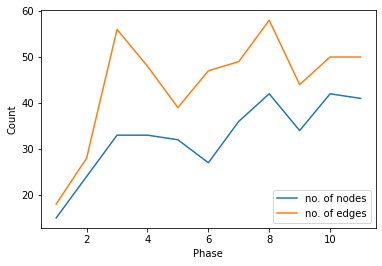

In [54]:
phases_q1 = [2,6,10]

for i in phases_q1:
    print("phase {}: no. of nodes: {}, no. of edges: {}".format(i, len(G[i].nodes), len(G[i].edges)))

no_nodes = np.empty([11,])
no_edges = np.empty([11,])

for i in range(len(G)):
    no_nodes[i] = len(G[i+1].nodes)
    no_edges[i] = len(G[i+1].edges)

plt.plot(np.arange(1,12), no_nodes, label="no. of nodes")
plt.plot(np.arange(1,12), no_edges, label="no. of edges")
plt.legend()
plt.xlabel("Phase")
plt.ylabel("Count")
plt.savefig("../03_report/problem_02/nodes_edges.png", dpi=300)

no_nodes

### Part (a) Question 2

Try visualizing the graph at each phase. For **networkx** you can use

*nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True)*

where the *graphviz* layout algorithm graphviz_layout has been used.

The graphviz algorithm is recommended for these complex graphs, and you will need it to answer some of these questions. You can install it on Ubuntu using 

*sudo apt-get install graphviz graphviz-dev
pip install pygraphviz*

or you can install it on Google Colab by running the following in its own cell: 

*!apt-get install graphviz graphviz-dev
!pip install pygraphviz*

Visualize the graph for **Phase 3**. Which of the following plots below correspond to **Phase 3**?

![networks](https://courses.edx.org/assets/courseware/v1/047e5f3adc46d784c2ea67762bf0d94f/asset-v1:MITx+6.419x+3T2021+type@asset+block/images_networks_hw_visualization.svg)

In [55]:
#TODO: make this visualization tool working!!!
#answer can be found by looking at the raw data: edge between n4 and n5
#nx.draw(G[3],pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)

### Part (b) Question 1

For each of the 11 phases and for each of the players under investigation **(i.e., the 23 listed above)**, compute and list the normalized degree centrality of the player.

The normalized degree centrality of node $i$ is defined as
  	
$\tilde{k}_i = \frac{k_i}{n-1}$	  	 

where $k_i$ is the degree of node $i$ and $n$ is the number of nodes in the graph.

You can compute the normalized degree centrality using the **networkx** function *networkx.degree_centrality*.

Provide the degree centrality for the following four players, at the specified phases: (Provide your answer to **three significant figures**, answer graded to 1% tolerance.) 

In [56]:
# answer for the question
players = ["n1","n3","n12","n83"]
phases_q2 = [3, 9]
for i in players:
    for j in phases_q2:
        print("player " + i +" - phase {}: {:.3}".format(j, nx.algorithms.centrality.degree_centrality(G[j])[i]))

#answer for the task (needs to be modified for the 23 target persons under investigation)
centrality = np.zeros((110, 11))
for i in range(centrality.shape[0]):
    for j in range(centrality.shape[1]):
        current_player = "n{}".format(i+1)
        if current_player in G[j+1].nodes:
            centrality[i,j] = nx.algorithms.centrality.degree_centrality(G[j+1])[current_player]

player n1 - phase 3: 0.844
player n1 - phase 9: 0.303
player n3 - phase 3: 0.281
player n3 - phase 9: 0.333
player n12 - phase 3: 0.0625
player n12 - phase 9: 0.242
player n83 - phase 3: 0.25
player n83 - phase 9: 0.0303


### Part (b) Question 2
For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the player.

For undirected graphs, the normalized betweenness centrality for node $i$ is defined as

$\tilde{B}_i=\frac{2}{(n-1)(n-2)}\sum_{n \neq i \neq t}\frac{n^i_{st}}{g_{st}}$,

where $n^i_{st} is the number of shortest paths between $s$ and $t$ that pass through $i$ and $g_{st} is the total number of shortest paths between $s$ and $t$. Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for $n^i_{st}$ and for $n^i_{ts}$).

You can compute the normalized betweenness centrality using the **networkx** function 
*networkx.betweenness_centrality(graph, normalized = True)*

Provide the normalized betweenness centrality for the following four players, at the specified phases: (Provide your answer to **three significant figures**, answer graded to 1% tolerance.) 

In [57]:
for i in players:
    for j in phases_q2:
        print("player " + i +" - phase {}: {:.3}".format(j, nx.algorithms.centrality.betweenness_centrality(G[j])[i]))

betweenness = np.zeros((110,11))
for i in range(betweenness.shape[0]):
    for j in range(betweenness.shape[1]):
        current_player = "n{}".format(i+1)
        if current_player in G[j+1].nodes:
            betweenness[i,j] = nx.algorithms.centrality.betweenness_centrality(G[j+1])[current_player]

player n1 - phase 3: 0.83
player n1 - phase 9: 0.249
player n3 - phase 3: 0.0955
player n3 - phase 9: 0.576
player n12 - phase 3: 0.0
player n12 - phase 9: 0.357
player n83 - phase 3: 0.0466
player n83 - phase 9: 0.0


### Part (b) Question 3

For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.

Ensure your eigenvector centrality is normalized as

$\sqrt{\sum_i v^2_i} = 1$

You can compute the eigenvector centrality with this normalization using the **networkx** function *networkx.eigenvector_centrality*.

Provide the eigenvector centrality for the following four players, at the specified phases: (Provide your answer to **three significant figures**, answer graded to 1% tolerance.) 

In [58]:
for i in players:
    for j in phases_q2:
        print("player " + i +" - phase {}: {:.3}".format(j, nx.algorithms.centrality.eigenvector_centrality(G[j])[i]))

eigenvector_centrality = np.zeros((110,11))
for i in range(eigenvector_centrality.shape[0]):
    for j in range(eigenvector_centrality.shape[1]):
        current_player = "n{}".format(i+1)
        if current_player in G[j+1].nodes:
            eigenvector_centrality[i,j] = nx.algorithms.centrality.eigenvector_centrality(G[j+1])[current_player]

player n1 - phase 3: 0.594
player n1 - phase 9: 0.459
player n3 - phase 3: 0.291
player n3 - phase 9: 0.468
player n12 - phase 3: 0.136
player n12 - phase 9: 0.141
player n83 - phase 3: 0.277
player n83 - phase 9: 0.0918


### Part (b) Question 4

Recall the mathematical definition of each of these metrics, along with the algorithm that is best suited to compute it and the corresponding time complexity.

Which algorithm is the fastest for this data set? 

Answer: From all of the three centrality measures, the normalized degree centrality is the fastest algorithm and the best suited for this network.  

### Part (b) Question 5

The data from questions 1 to 3 can be used to perform different types of quantitative analyses. In this question we will look at performing one such analysis - we will determine the *temporal consistency* of a player's centrality , i.e. which players consistently remained active and central throughout most of the phases and which didn't?

To answer this question, look at the temporal evolution of the networks and calculate the mean centrality for each of the centrality metrics, across all phases, for every player.

Note: As every actor might not be present in every phase, attach a centrality of zero (0) to an actor for the phases in which they are not present, *before* calculating these statistics, so that you take a mean over all 11 phases for all actors. (**Food for thought**, **not graded**: What are the implications of this step? What else could you do to ensure that your numbers are comparable with each other?)

For the betweenness centrality, which three players have the highest mean? (Enter an integer, eg: *1* for **n1**, *2* for **n2**, etc.)

In [59]:
# betweenness centrality, order ascending
print(np.argsort(np.mean(betweenness,axis=1))[-3:]+1)
print(np.mean(betweenness,axis=1)[np.argsort(np.mean(betweenness,axis=1))[-3:]])

[ 3 12  1]
[0.12940286 0.16756212 0.65505099]


In [60]:
# eigenvector centrality, order ascending
print(np.argsort(np.mean(eigenvector_centrality,axis=1))[-3:]+1)
print(np.mean(eigenvector_centrality,axis=1)[np.argsort(np.mean(eigenvector_centrality,axis=1))[-3:]])

[85  3  1]
[0.19061182 0.29809466 0.54639108]


In the following lines there are just some code snippets for other problems or questions in the report.

In [61]:
#np.sort(betweenness[:,4])[-5:]
np.argsort(betweenness[:,4])[-5:]+1

array([85, 31, 83, 12,  1], dtype=int64)

In [113]:
# development of the network over phases
for i in range(len(G)):
    # Up to here we use an undorected network (template from problem), therefore arrows misleading
    #nx.draw(G[i + 1], node_size=20,label="phase{}".format(i + 1), arrows=True, width=0.5, alpha=0.7)
    nx.draw(G[i + 1], node_size=30,label="phase{}".format(i + 1), width=0.7, alpha=0.7)
    plt.savefig("../03_report/problem_02/network_phase{}.png".format(i + 1), dpi=300)
    plt.close()

In [112]:
# visualization of networks (specific phases, with labels)
spec_phases = [3,4,5,8,9,10]

for i in spec_phases:
    #nx.draw(G[i], node_size=20,label="phase{}".format(i), arrows=True, width=0.5, alpha=1, with_labels=True)
    nx.draw(G[i], node_size=20,label="phase{}".format(i), width=0.5, alpha=1, with_labels=True)
    plt.savefig("../03_report/problem_02/network_labels_phase{}.png".format(i), dpi=300)
    plt.close()


In [65]:
most_centrality = np.argsort(np.mean(betweenness,axis=1))[-23:]+1
most_wanted = np.array([1,3,83,86,85,6,11,88,106,89,84,5,8,76,77,87,82,96,12,17,80,33,16])
# compare arrays
not_equals = []
for person_central in most_centrality:
    if not person_central in most_wanted:
        not_equals.append(person_central)
not_equals

[13, 31, 22, 9, 7, 37, 79, 14, 41]

<function matplotlib.pyplot.show(close=None, block=None)>

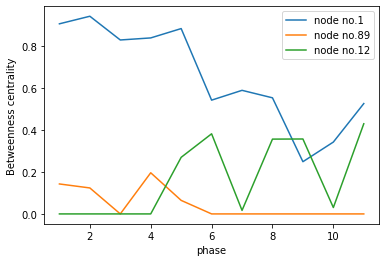

In [64]:
# plot the betweenness of node no. 1
plt.plot(range(1,12), betweenness[0,:], label="node no.1")
plt.plot(range(1,12), betweenness[89-1,:], label="node no.89")
plt.plot(range(1,12), betweenness[12-1,:], label="node no.12")
plt.legend()
plt.xlabel("phase")
plt.ylabel("Betweenness centrality")
plt.savefig("../03_report/problem_02/betweenness_specific_nodes.png", dpi=300)

plt.show

In [103]:
# calculate new networks (directed!)
G_dir = {}
for i in range(1,12): 
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    G_dir[i] = nx.from_pandas_adjacency(phases[i], create_using=nx.DiGraph())
    G_dir[i].name = var_name

In [104]:
# Calculate the hub and authority centrality for each node
hubs = np.zeros((110,11))
authorities = np.zeros_like(hubs)

for i in range(1, len(G_dir) + 1):
    hubs_i, authorities_i = nx.algorithms.link_analysis.hits(G_dir[i], max_iter=1000000)
    for hub_i in hubs_i:
        hubs[int(hub_i[1:]) - 1, i - 1] = hubs_i[hub_i]
    for auth_i in authorities_i:
        authorities[int(auth_i[1:]) - 1, i - 1] = authorities_i[auth_i]

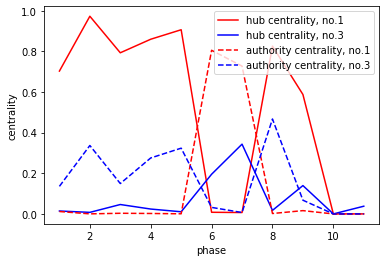

In [110]:
# plot the values for node no. 1 and no. 3
plt.plot(np.arange(1,12), hubs[1 - 1, :], "r", label="hub centrality, no.1")
plt.plot(np.arange(1,12), hubs[3 - 1, :], "b", label="hub centrality, no.3")
plt.plot(np.arange(1,12), authorities[1 - 1, :], "r--", label="authority centrality, no.1")
plt.plot(np.arange(1,12), authorities[3 - 1, :], "b--", label="authority centrality, no.3")

plt.xlabel("phase")
plt.ylabel("centrality")

plt.legend()
plt.show

plt.savefig("../03_report/problem_02/hubs_authorities.png", dpi=300)

In [77]:
a, b = nx.algorithms.link_analysis.hits(G[1], max_iter=1000000)
b

{'n1': 0.09741025051739848,
 'n4': 0.012471775061522946,
 'n89': 0.013346937859537758,
 'n83': 0.1731392130959347,
 'n3': 0.037792978748068425,
 'n5': 0.02494355012304589,
 'n88': 0.10035989706312377,
 'n85': 0.19883807034597975,
 'n90': 0.012471775061522946,
 'n2': 0.02494355012304589,
 'n7': 0.003417710268891016,
 'n54': 0.02494355012304589,
 'n6': 0.25097719148583664,
 'n64': 0.012471775061522946,
 'n8': 0.012471775061522946}